In [1]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

In [2]:
dataset=pd.read_csv('CLV.csv')

In [3]:
dataset

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
5,192,148
6,294,153
7,263,173
8,199,162
9,168,174


In [4]:
len(dataset) # of rows

303

In [5]:
dataset.describe().transpose() #descriptive statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


Text(0.5, 0, 'Income / spend')

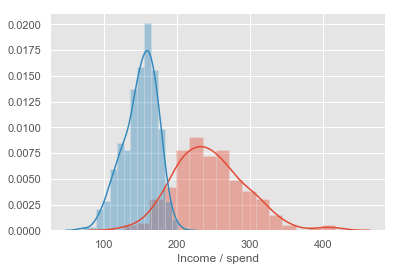

In [6]:
#Visualising the data
plot_income = sns.distplot(dataset["INCOME"])
plot_spend = sns.distplot(dataset["SPEND"])
plt.xlabel('Income / spend')

[(0, 420)]

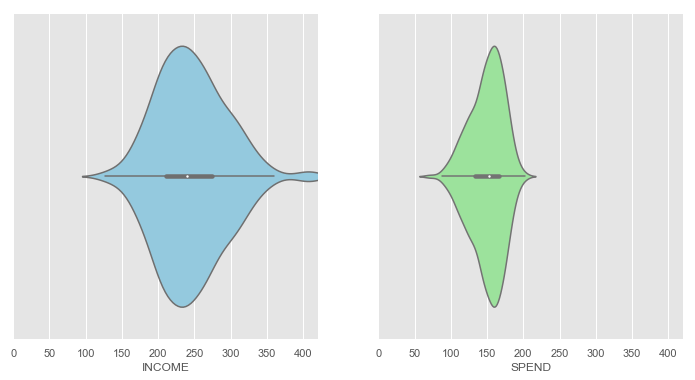

In [7]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=dataset, x='INCOME', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=dataset, x='SPEND',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

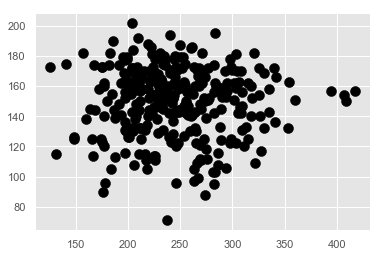

In [8]:
# Plotting the values to understand the spread
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=100)

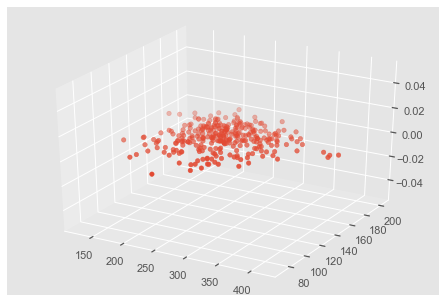

In [9]:
##plot in 3D space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])

In [10]:
X=dataset.iloc[:,[0,1]].values

In [11]:
dataset

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
5,192,148
6,294,153
7,263,173
8,199,162
9,168,174


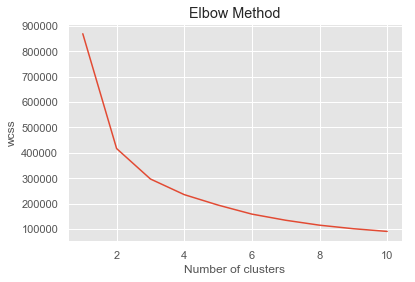

In [12]:
#Using the elbow method to find the ideal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
##Fitting kmeans to the dataset
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

In [14]:
y_means

array([3, 3, 2, 3, 1, 2, 1, 3, 2, 2, 3, 0, 3, 2, 3, 2, 1, 0, 3, 3, 3, 3,
       3, 0, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 1, 3, 3, 1, 1, 3, 2, 0,
       1, 1, 3, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 1, 0, 1, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 1, 1, 1, 0, 3, 3, 2,
       2, 0, 3, 2, 3, 1, 2, 0, 1, 3, 1, 3, 3, 0, 2, 3, 2, 2, 0, 3, 3, 3,
       1, 2, 1, 2, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 2, 3, 2, 0, 2, 3,
       1, 3, 1, 3, 2, 2, 2, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 2, 0, 0, 3, 3, 2, 3, 3, 1, 3, 2, 2,
       3, 1, 2, 0, 1, 0, 1, 3, 0, 1, 3, 0, 3, 2, 1, 2, 2, 0, 2, 1, 3, 3,
       0, 3, 2, 0, 0, 3, 2, 3, 3, 3, 2, 2, 3, 0, 2, 1, 3, 1, 0, 1, 0, 3,
       1, 0, 3, 0, 0, 2, 0, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 1, 3, 0, 3,
       2, 0, 2, 3, 1, 0, 3, 3, 1, 3, 0, 1, 0, 1, 0, 2, 3, 3, 3, 3, 0, 3,
       2, 2, 1, 2, 0, 0, 3, 3, 0, 3, 0, 2, 0, 0, 1, 2, 1, 2, 2, 3, 2, 1,
       2, 3, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 0, 0, 2,

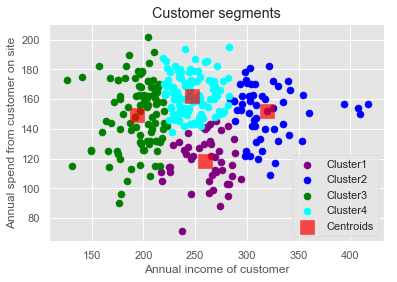

In [15]:
#Visualising the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

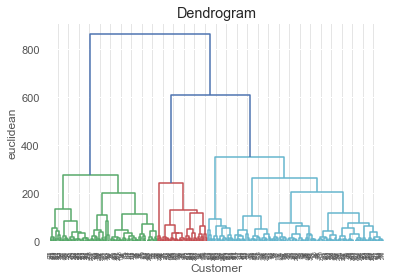

In [16]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel('Customer')
plt.ylabel('euclidean')
plt.show()

In [17]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(X)

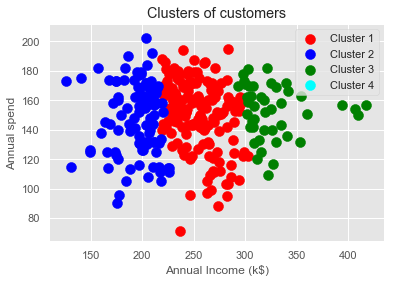

In [19]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Annual spend')
plt.legend()
plt.show()